In [2]:
import numpy as np
import pandas as pd

In [112]:
num_samples = 80000

In [113]:
# Simulate responses for Section A questions (1-10), scored 1-5
section_a_responses = np.random.randint(1, 6, size=(num_samples, 10))
section_a_responses.shape

(80000, 10)

In [114]:
# Simulate responses for Section B questions (1-5), scored 1-8 (mapped to interests)
section_b_responses = np.random.randint(1, 8, size=(num_samples, 5))
section_b_responses.shape

(80000, 5)

In [115]:
data = pd.DataFrame(section_a_responses, columns=[f'A_Q{i+1}' for i in range(10)])
data = pd.concat([data, pd.DataFrame(section_b_responses, columns=[f'B_Q{i+1}' for i in range(5)])], axis=1)
data

,A_Q1,A_Q2,A_Q3,A_Q4,A_Q5,A_Q6,A_Q7,A_Q8,A_Q9,A_Q10,B_Q1,B_Q2,B_Q3,B_Q4,B_Q5
0,4,1,4,2,4,3,1,5,5,1,1,3,1,3,4
1,3,1,2,5,3,2,1,3,1,1,1,4,7,7,5
2,1,1,4,1,1,2,1,3,4,3,2,5,5,7,1
3,4,2,4,3,3,2,4,5,4,4,6,7,6,7,2
4,2,2,5,1,4,3,2,3,5,5,5,4,2,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,5,1,4,1,2,3,1,5,3,3,4,5,7,6,6
79996,3,2,2,2,5,4,3,3,4,2,5,3,6,3,4
79997,4,4,5,2,3,1,1,2,2,3,2,4,7,1,4
79998,3,4,2,1,5,1,4,4,4,4,4,6,1,1,2


In [116]:
# Calculate personality trait scores based on Section A (e.g., sum scores for questions related to each trait)
data['Openness'] = np.round_((data['A_Q1'] + data['A_Q6']) / 2)
data['Conscientiousness'] = np.round_((data['A_Q2'] + data['A_Q7']) / 2)
data['Extraversion'] = np.round_((data['A_Q3'] + data['A_Q8']) / 2)
data['Agreeableness'] = np.round_((data['A_Q4'] + data['A_Q9']) / 2)
data['Neuroticism'] = np.round_((data['A_Q5'] + data['A_Q10']) / 2)
data['Interest'] = data[['B_Q1', 'B_Q2', 'B_Q3', 'B_Q4', 'B_Q5']].apply(lambda row: row.mode()[0], axis=1)
data

,A_Q1,A_Q2,A_Q3,A_Q4,A_Q5,A_Q6,A_Q7,A_Q8,A_Q9,A_Q10,...,B_Q2,B_Q3,B_Q4,B_Q5,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Interest
0,4,1,4,2,4,3,1,5,5,1,...,3,1,3,4,4.0,1.0,4.0,4.0,2.0,1
1,3,1,2,5,3,2,1,3,1,1,...,4,7,7,5,2.0,1.0,2.0,3.0,2.0,7
2,1,1,4,1,1,2,1,3,4,3,...,5,5,7,1,2.0,1.0,4.0,2.0,2.0,5
3,4,2,4,3,3,2,4,5,4,4,...,7,6,7,2,3.0,3.0,4.0,4.0,4.0,6
4,2,2,5,1,4,3,2,3,5,5,...,4,2,5,5,2.0,2.0,4.0,3.0,4.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,5,1,4,1,2,3,1,5,3,3,...,5,7,6,6,4.0,1.0,4.0,2.0,2.0,6
79996,3,2,2,2,5,4,3,3,4,2,...,3,6,3,4,4.0,2.0,2.0,3.0,4.0,3
79997,4,4,5,2,3,1,1,2,2,3,...,4,7,1,4,2.0,2.0,4.0,2.0,3.0,4
79998,3,4,2,1,5,1,4,4,4,4,...,6,1,1,2,2.0,4.0,3.0,2.0,4.0,1


In [11]:
# "": {5: [], 4: [], 3: [], 2: [], 1: []}
resultMapper = {
    1: {"name": "Computing And Technology", "Neuroticism": {5: [], 4: [], 3: [], 2: ["Game Development", "Computer Science", "IT", "Software Engineering", "Multimedia Technology", "Cybersecurity", "Artificial Intelligence"], 1: []}, "Agreeableness": {5: [], 4: [], 3: ["Game Development", "Computer Science", "IT", "Software Engineering", "Multimedia Technology", "Artificial Intelligence"], 2: ["Cybersecurity"], 1: []}, "Extraversion": {5: [], 4: [], 3: ["Game Development", "Computer Science", "IT", "Software Engineering", "Multimedia Technology", "Cybersecurity", "Artificial Intelligence"], 2: [], 1: []}, "Conscientiousness": {5: ["Game Development", "Computer Science", "Software Engineering", "IT", "Cybersecurity", "Artificial Intelligence"], 4: ["Multimedia Technology"], 3: [], 2: [], 1: []},"Openness": {5: ["Multimedia Technology", "Game Development", "Artificial Intelligence"], 4: ["Computer Science", "Software Engineering", "IT"], 3: ["Cybersecurity"], 2: [], 1: []}},
    2: {"name": "Art and Design", "Neuroticism": {5: [], 4: [], 3: [], 2: ["Visual Effects", "Animation", "Digital Advertising", "Industrial Design"], 1: []}, "Agreeableness": {5: [], 4: ["Digital Advertisement", "Industrial Design"], 3: ["Visual Effects", "Animation"], 2: [], 1: []}, "Extraversion": {5: ["Digital Advertising"], 4: [], 3: ["Industrial Design"], 2: ["Visual Effects", "Animation"], 1: []}, "Conscientiousness": {5: ["Visual Effects", "Animation", "Industrial Design"], 4: ["Digital Advertising"], 3: [], 2: [], 1: []}, "Openness": {5: ["Visual Effects", "Animation", "Digital Advertising", "Industrial Design"], 4: [], 3: [], 2: [], 1: []}},
    3: {"name": "Business and Marketing", "Neuroticism": {5: [], 4: [], 3: [], 2: ["Business Management", "Marketing Management", "Tourism Management", "International Business Marketing"], 1: ["HR"]}, "Agreeableness": {5: ["HR", "Tourism Management"], 4: ["Marketing Management", "International Business Marketing"], 3: ["Business Management"], 2: [], 1: []}, "Extraversion": {5: ["HR", "Marketing Management", "Tourism Management", "International Business Marketing"], 4: ["Business Management "], 3: [], 2: [], 1: []}, "Conscientiousness": {5: ["Business & Management", "HR", "International Business Marketing"], 4: ["Marketing Management", "Tourism Management"], 3: [], 2: [], 1: []}, "Openness": {5: ["Marketing Management", "Tourism Management", "International Business Marketing"], 4: ["Business & Management", "HR"], 3: [], 2: [], 1: []}},
    4: {"name": "Accounting and Banking", "Neuroticism": {5: [], 4: [], 3: [], 2: [], 1: ["Banking & Finance", "Accounting & Finance", "Actuarial Studies"]}, "Agreeableness": {5: [], 4: [], 3: ["Banking & Finance", "Accounting & Finance", "Actuarial Studies"], 2: [], 1: []}, "Extraversion": {5: [], 4: [], 3: ["Banking & Finance"], 2: ["Accounting & Finance", "Actuarial Studies"], 1: []}, "Conscientiousness": {5: ["Banking & Finance", "Actuarial Studies", "Accounting & Finance"], 4: [], 3: [], 2: [], 1: []}, "Openness": {5: [], 4: ["Banking & Finance"], 3: ["Accounting & Finance", "Actuarial Studies"], 2: [], 1: []}},
    5: {"name": "Engineering", "Neuroticism": {5: [], 4: [], 3: [], 2: [], 1: ["Electrical & Electronic Engineering", "Petroleum Engineering", "Computer Engineering", "Mechatronic Engineering"]}, "Agreeableness": {5: [], 4: [], 3: ["Electrical & Electronic Engineering", "Petroleum Engineering", "Computer Engineering", "Mechatronic Engineering"], 2: [], 1: []}, "Extraversion": {5: [], 4: [], 3: ["Electrical & Electronic  Engineering", "Petroleum Engineering", "Computer Engineering"], 2: ["Mechatronic Engineering"], 1: []}, "Conscientiousness": {5: ["Electrical & Electronic Engineering", "Petroleum Engineering", "Computer Engineering", "Mechatronic Engineering"], 4: [], 3: [], 2: [], 1: []}, "Openness": {5: ["Mechatronic Engineering"], 4: ["Electrical & Electronic Engineering", "Petroleum Engineering", "Computer Engineering"], 3: [], 2: [], 1: []}},
    6: {"name": "Media and Communication", "Neuroticism": {5: [], 4: [], 3: [], 2: ["International Relations", "Media & Communication"], 1: []}, "Agreeableness": {5: [], 4: ["International Relations"], 3: ["Media & Communication"], 2: [], 1: []}, "Extraversion": {5: [], 4: ["International Relations", "Media & Communication"], 3: [], 2: [], 1: []}, "Conscientiousness": {5: ["International Relations"], 4: ["Media & Communication"], 3: [], 2: [], 1: []}, "Openness": {5: ["International Relations", "Media & Communication Studies"], 4: [], 3: [], 2: [], 1: []}},
    7: {"name": "Psychology", "Neuroticism": {5: [], 4: [], 3: ["Psychology"], 2: [], 1: []}, "Agreeableness": {5: ["Psychology"], 4: [], 3: [], 2: [], 1: []}, "Extraversion": {5: [], 4: [], 3: ["Psychology"], 2: [], 1: []}, "Conscientiousness": {5: [], 4: ["Psychology"], 3: [], 2: [], 1: []}, "Openness": {5: ["Psychology"], 4: [], 3: [], 2: [], 1: []}}
}

In [118]:
# Function to determine suggested courses with fallback strategies
def get_suggested_courses_with_fallback(row):
    interest = row["Interest"]  # Access the interest key
    suggested_courses = []  # Initialize as a list to maintain priority order

    # Check if the interest exists in resultMapper
    if interest in resultMapper:
        interest_mapping = resultMapper[interest]

        # Sort traits by scores in descending order
        traits_sorted = sorted(
            ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"],
            key=lambda trait: row[trait],
            reverse=True
        )
        
        # Iterate through traits in sorted order
        for trait in traits_sorted:
            trait_score = int(row[trait])  # Convert the score to an integer
            
            # Attempt to find courses for the current score
            courses = interest_mapping[trait].get(trait_score, [])
            
            # Add courses to the list, avoiding duplicates
            for course in courses:
                if course not in suggested_courses:
                    suggested_courses.append(course)
        
        # Fallback: Attempt to find courses for lower scores
        if not suggested_courses:
            for trait in traits_sorted:
                for lower_score in range(int(row[trait]) - 1, 0, -1):  # Convert to int
                    courses = interest_mapping[trait].get(lower_score, [])
                    for course in courses:
                        if course not in suggested_courses:
                            suggested_courses.append(course)
        
        # Fallback: Assign default courses if still empty
        if not suggested_courses:
            default_courses = ["General Studies", "Foundational Course"]  # Example fallback courses
            suggested_courses = default_courses
    
    return suggested_courses

# Apply the function to all rows in the DataFrame
data["suggested_courses"] = data.apply(get_suggested_courses_with_fallback, axis=1)


In [120]:
data.head()
data.to_csv("./data/data.csv")

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

data = pd.read_csv("./data/data.csv")

# Prepare the Data
X = data[["A_Q1", "A_Q2", "A_Q3", "A_Q4", "A_Q5", "A_Q6", "A_Q7", "A_Q8", "A_Q9", "A_Q10", 
          "B_Q1", "B_Q2", "B_Q3", "B_Q4", "B_Q5"]].values
y_traits = data[["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]].values
y_interest = data["Interest"].values - 1  # Adjust to zero-based

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the Data
X_train, X_test, y_interest_train, y_interest_test, y_traits_train, y_traits_test = train_test_split(
    X_scaled, y_interest, y_traits, test_size=0.2, random_state=42, stratify=y_interest
)

def build_model(dropout_rate=0.01, l2_lambda=0.01):
    # Input layer
    input_layer = Input(shape=(15,), name="questions_input")
    
    # First block
    x = Dense(128, activation="relu", kernel_regularizer=l2(l2_lambda))(input_layer)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)
    
    # Second block
    x = Dense(64, activation="relu", kernel_regularizer=l2(l2_lambda))(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)
    
    # Interest prediction branch
    interest_branch = Dense(16, activation="relu", kernel_regularizer=l2(l2_lambda))(x)
    interest_branch = BatchNormalization()(interest_branch)
    interest_output = Dense(7, activation="softmax", name="interest_output")(interest_branch)
    
    # Traits prediction branch
    traits_branch = Dense(16, activation="relu", kernel_regularizer=l2(l2_lambda))(x)
    traits_branch = BatchNormalization()(traits_branch)
    traits_output = Dense(5, activation="linear", name="traits_output")(traits_branch)
    
    # Define the Model
    model = Model(inputs=input_layer, outputs=[interest_output, traits_output])
    
    # Compile with custom loss weights
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss={
            "interest_output": "sparse_categorical_crossentropy",
            "traits_output": "mse",
        },
        loss_weights={
            "interest_output": 1.0,
            "traits_output": 0.5
        },
        metrics={
            "interest_output": "accuracy",
            "traits_output": "mae",
        }
    )
    return model



Training model with 10 epochs...
Epoch 1/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 968us/step - interest_output_accuracy: 0.3108 - interest_output_loss: 1.7330 - loss: 4.6119 - traits_output_loss: 3.5900 - traits_output_mae: 1.4283 - val_interest_output_accuracy: 0.4423 - val_interest_output_loss: 1.3356 - val_loss: 1.6334 - val_traits_output_loss: 0.1539 - val_traits_output_mae: 0.3189 - learning_rate: 0.0010
Epoch 2/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - interest_output_accuracy: 0.4748 - interest_output_loss: 1.3032 - loss: 1.5674 - traits_output_loss: 0.1790 - traits_output_mae: 0.3398 - val_interest_output_accuracy: 0.5953 - val_interest_output_loss: 0.9997 - val_loss: 1.1595 - val_traits_output_loss: 0.0792 - val_traits_output_mae: 0.2204 - learning_rate: 0.0010
Epoch 3/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 1s 892us/step - interest_output_accuracy: 0.5809 - interest_output_loss: 1.0495 - loss: 1.2320 - traits_output_loss: 0.1254 - traits_output_mae: 0.2778 - val_interest_output

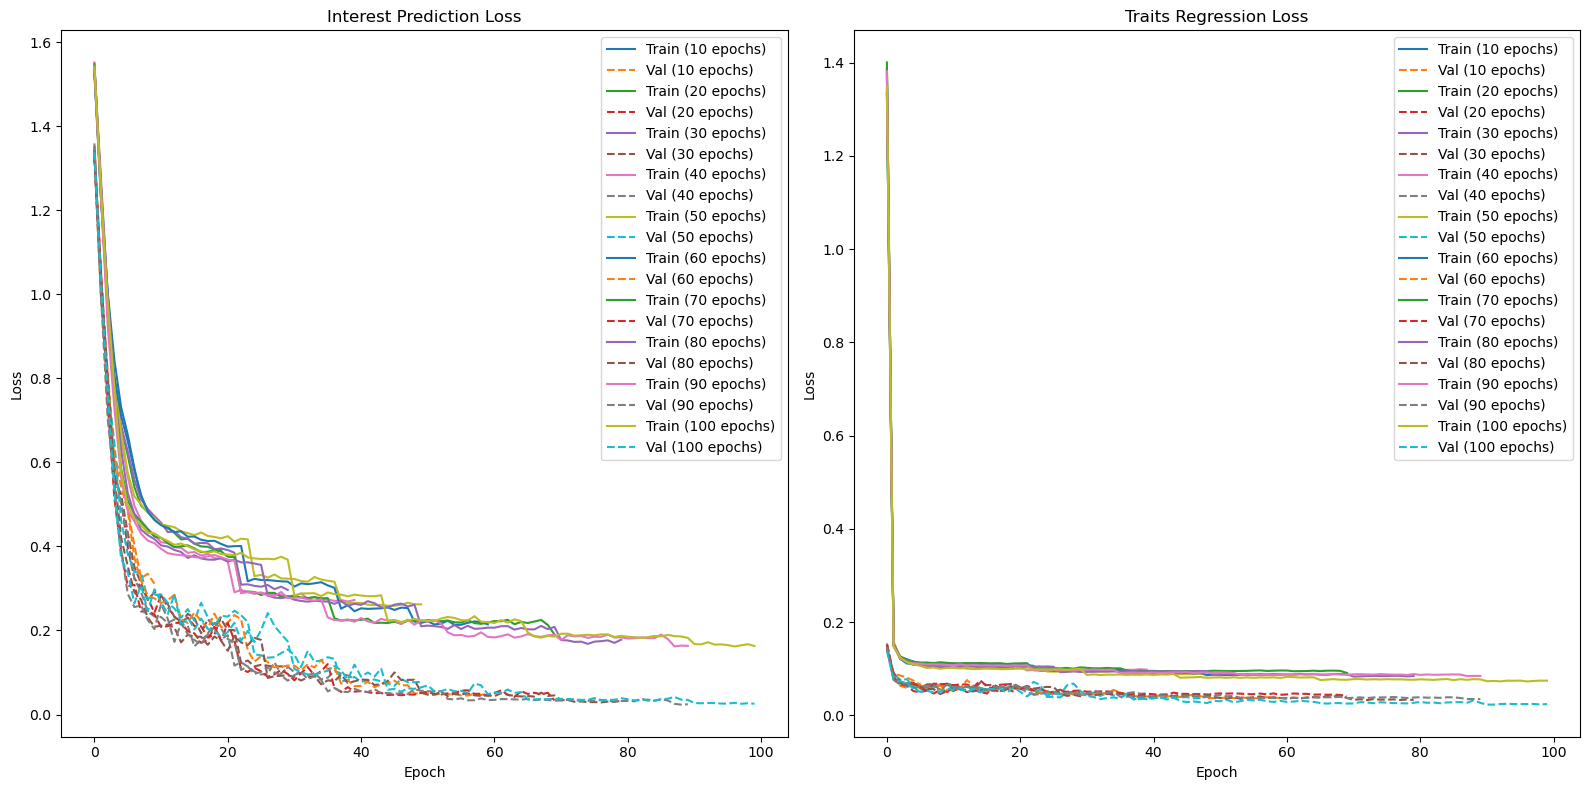

In [2]:
# Create callbacks
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6
    )
]

# Train the model with different epoch values
epoch_values = [10, 20, 30, 40, 50, 60, 70, 80 , 90, 100]
results = {}

for epochs in epoch_values:
    print(f"Training model with {epochs} epochs...")
    model = build_model()
    history = model.fit(
        X_train,
        {"interest_output": y_interest_train, "traits_output": y_traits_train},
        validation_split=0.2,
        epochs=epochs,
        batch_size=32,
        callbacks=callbacks,
        verbose=1
    )
    # Store history
    results[epochs] = history.history

# Plot training and validation losses
plt.figure(figsize=(16, 8))

# Plot interest classification loss
plt.subplot(1, 2, 1)
for epochs, history in results.items():
    plt.plot(history["interest_output_loss"], label=f"Train ({epochs} epochs)")
    plt.plot(history["val_interest_output_loss"], linestyle="--", label=f"Val ({epochs} epochs)")
plt.title("Interest Prediction Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Plot traits regression loss
plt.subplot(1, 2, 2)
for epochs, history in results.items():
    plt.plot(history["traits_output_loss"], label=f"Train ({epochs} epochs)")
    plt.plot(history["val_traits_output_loss"], linestyle="--", label=f"Val ({epochs} epochs)")
plt.title("Traits Regression Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [3]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


# Create callbacks
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6
    )
]

# Select the best number of epochs (e.g., 50 based on your analysis)
best_epochs = 100

# Train the model with callbacks
final_model = build_model()
final_history = final_model.fit(
    X_train,
        {"interest_output": y_interest_train, "traits_output": y_traits_train},
        validation_split=0.2,
        epochs=epochs,
        batch_size=32,
        callbacks=callbacks,
        verbose=1
)

Epoch 1/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - interest_output_accuracy: 0.3101 - interest_output_loss: 1.7151 - loss: 4.4986 - traits_output_loss: 3.5447 - traits_output_mae: 1.4165 - val_interest_output_accuracy: 0.4223 - val_interest_output_loss: 1.3809 - val_loss: 1.6315 - val_traits_output_loss: 0.1362 - val_traits_output_mae: 0.3004 - learning_rate: 0.0010
Epoch 2/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - interest_output_accuracy: 0.4583 - interest_output_loss: 1.3260 - loss: 1.5520 - traits_output_loss: 0.1592 - traits_output_mae: 0.3192 - val_interest_output_accuracy: 0.5673 - val_interest_output_loss: 1.0712 - val_loss: 1.2155 - val_traits_output_loss: 0.0678 - val_traits_output_mae: 0.1993 - learning_rate: 0.0010
Epoch 3/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - interest_output_accuracy: 0.5833 - interest_output_loss: 1.0487 - loss: 1.2257 - traits_output_loss: 0.1230 - traits_output_mae: 0.2730 - val_interest_output_accuracy: 0.6824 - val_interest_out

In [8]:
import os
import pickle
import json

def save_model_complete(model, scaler, save_dir, model_name):
    """
    Save the complete model, including the model architecture, weights,
    and the scaler used for preprocessing.
    
    Args:
        model: Trained Keras model
        scaler: Fitted StandardScaler
        save_dir: Directory to save the model
        model_name: Name of the model (will be used as prefix for saved files)
    """
    # Create directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)
    
    try:
        # 1. Save the model architecture and weights
        model_path = os.path.join(save_dir, f"{model_name}.keras")
        model.save(model_path)
        print(f"Model saved to {model_path}")
        
        # 2. Save the scaler
        scaler_path = os.path.join(save_dir, f"{model_name}_scaler.pkl")
        with open(scaler_path, 'wb') as f:
            pickle.dump(scaler, f)
        print(f"Scaler saved to {scaler_path}")
        
        # 3. Save model configuration/hyperparameters (optional)
        config = {
            'model_name': model_name,
            'input_shape': model.input_shape[1:][0],
            'output_shapes': {
                'interest_output': model.get_layer('interest_output').get_config()['units'],
                'traits_output': model.get_layer('traits_output').get_config()['units']
            },
            'training_config': model.get_config()
        }
        
        config_path = os.path.join(save_dir, f"{model_name}_config.json")
        with open(config_path, 'w') as f:
            json.dump(config, f, indent=4)
        print(f"Model configuration saved to {config_path}")
        
        return True
        
    except Exception as e:
        print(f"Error saving model: {str(e)}")
        return False

In [5]:
model_name = "personality_model_v2"
save_dir = "./modles"
#save_success = save_model_complete(final_model, scaler, save_dir, model_name)

In [6]:
def get_suggested_courses_with_fallback(predicted_interest, predicted_traits):
    """
    Map the predicted interest and trait scores to suggested courses using resultMapper.
    
    Parameters:
    - predicted_interest: The predicted interest category (integer, 1–7).
    - predicted_traits: A 1D numpy array of predicted trait scores (e.g., [3.5, 2.9, 2.9, 3.0, 2.0]).
    
    Returns:
    - A list of suggested courses based on resultMapper.
    """
    # Initialize suggested courses list
    suggested_courses = []

    # Check if the interest exists in resultMapper
    if predicted_interest in resultMapper:
        interest_mapping = resultMapper[predicted_interest]
        
        # Define trait names in order to map traits scores to resultMapper
        trait_names = ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]
        
        # Combine trait names and scores into a list of tuples for sorting
        traits_with_scores = list(zip(trait_names, predicted_traits[0]))
        
        # Sort traits by scores in descending order
        traits_sorted = sorted(traits_with_scores, key=lambda x: x[1], reverse=True)
        
        # Iterate through traits in sorted order
        for trait, score in traits_sorted:
            trait_score = int(score)  # Convert the score to an integer
            
            # Attempt to find courses for the current score
            courses = interest_mapping.get(trait, {}).get(trait_score, [])
            
            # Add courses to the list, avoiding duplicates
            for course in courses:
                if course not in suggested_courses:
                    suggested_courses.append(course)
        
        # Fallback: Attempt to find courses for lower scores
        if not suggested_courses:
            for trait, score in traits_sorted:
                for lower_score in range(int(score) - 1, 0, -1):  # Convert to int and decrement
                    courses = interest_mapping.get(trait, {}).get(lower_score, [])
                    for course in courses:
                        if course not in suggested_courses:
                            suggested_courses.append(course)
        
        # Fallback: Assign default courses if still empty
        if not suggested_courses:
            default_courses = ["General Studies", "Foundational Course"]  # Example fallback courses
            suggested_courses = default_courses

    return suggested_courses

In [9]:
from tensorflow.keras.models import load_model
import pickle

def load_model_complete(save_dir, model_name):
    """
    Load the complete model, including the model architecture, weights,
    and the scaler used for preprocessing.
    
    Args:
        save_dir: Directory where the model is saved
        model_name: Name of the model
        
    Returns:
        tuple: (loaded_model, loaded_scaler)
    """
    try:
        # 1. Load the model
        model_path = os.path.join(save_dir, f"{model_name}.keras")
        loaded_model = load_model(model_path)
        print(f"Model loaded from {model_path}")
        
        # 2. Load the scaler
        scaler_path = os.path.join(save_dir, f"{model_name}_scaler.pkl")
        with open(scaler_path, 'rb') as f:
            loaded_scaler = pickle.load(f)
        print(f"Scaler loaded from {scaler_path}")
        
        return loaded_model, loaded_scaler
        
    except Exception as e:
        print(f"Error loading model: {str(e)}")
        return None, None
# Load the saved best model
loaded_model, loaded_scalar = load_model_complete(save_dir, model_name)

Model loaded from ./modles/personality_model_v2.keras
Scaler loaded from ./modles/personality_model_v2_scaler.pkl


In [12]:
# Example test sample (replace with actual input values)
test_sample = np.array([[2, 3, 4, 2, 1, 5, 3, 2, 4, 3, 1, 2, 3, 4, 5]])

test_sample_scaled = loaded_scalar.transform(test_sample)

# Predict using the model
predicted_interest_probs, predicted_traits = loaded_model.predict(test_sample_scaled)

# Convert interest probabilities to category (0 to 6)
predicted_interest = np.argmax(predicted_interest_probs) + 1  # Add 1 to map back to the original range (1 to 7)
print(f"Predicted Interest: {predicted_interest}")

# Display predicted traits
print(f"Predicted Traits Scores: {predicted_traits}")

# Get suggested courses based on the model output
suggested_courses = get_suggested_courses_with_fallback(predicted_interest, predicted_traits)

# Print suggested courses
print(f"Suggested Courses: {suggested_courses}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Interest: 1
Predicted Traits Scores: [[3.8997838 3.0212908 3.0195312 2.9274895 1.918748 ]]
Suggested Courses: ['Cybersecurity', 'Game Development', 'Computer Science', 'IT', 'Software Engineering', 'Multimedia Technology', 'Artificial Intelligence']


In [13]:
# Evaluate the model on the test set
results = loaded_model.evaluate(
    X_test,
    {"interest_output": y_interest_test, "traits_output": y_traits_test},
    verbose=1
)

print("Model Evaluation Results:")
print(f"Interest Output Loss: {results[1]}")
print(f"Traits Output Loss: {results[2]}")
print(f"Interest Output Accuracy: {results[3]}")  # Accuracy for classification
print(f"Traits Output MAE: {results[4]}")  # MAE for regression

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - interest_output_accuracy: 0.9966 - interest_output_loss: 0.0272 - loss: 0.0889 - traits_output_loss: 0.0356 - traits_output_mae: 0.1371
Model Evaluation Results:
Interest Output Loss: 0.027643974870443344
Traits Output Loss: 0.035711515694856644
Interest Output Accuracy: 0.9968125224113464
Traits Output MAE: 0.13727818429470062


In [14]:
# Get predictions for interest
interest_predictions = loaded_model.predict(X_test)[0]  # [0] refers to interest_output predictions

# Convert softmax probabilities to predicted class labels
predicted_labels = np.argmax(interest_predictions, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
interest_accuracy = accuracy_score(y_interest_test, predicted_labels)

print(f"Interest Prediction Accuracy: {interest_accuracy:.2f}")

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step
Interest Prediction Accuracy: 1.00


In [15]:
# Get predictions for traits
traits_predictions = loaded_model.predict(X_test)[1]  # [1] refers to traits_output predictions

# Calculate MAE
from sklearn.metrics import mean_absolute_error
traits_mae = mean_absolute_error(y_traits_test, traits_predictions)

print(f"Traits Prediction MAE: {traits_mae:.2f}")


500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step
Traits Prediction MAE: 0.14


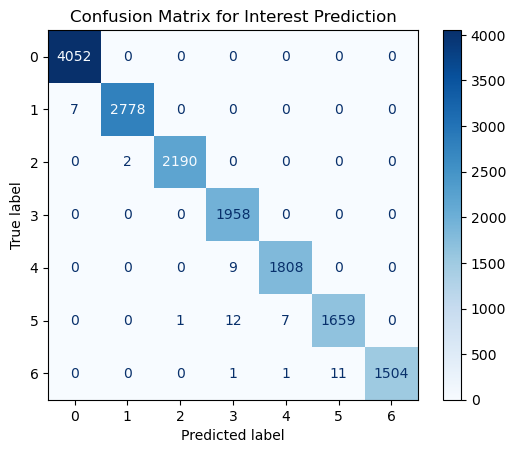

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix
conf_matrix = confusion_matrix(y_interest_test, predicted_labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=range(7))
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Interest Prediction")
plt.show()


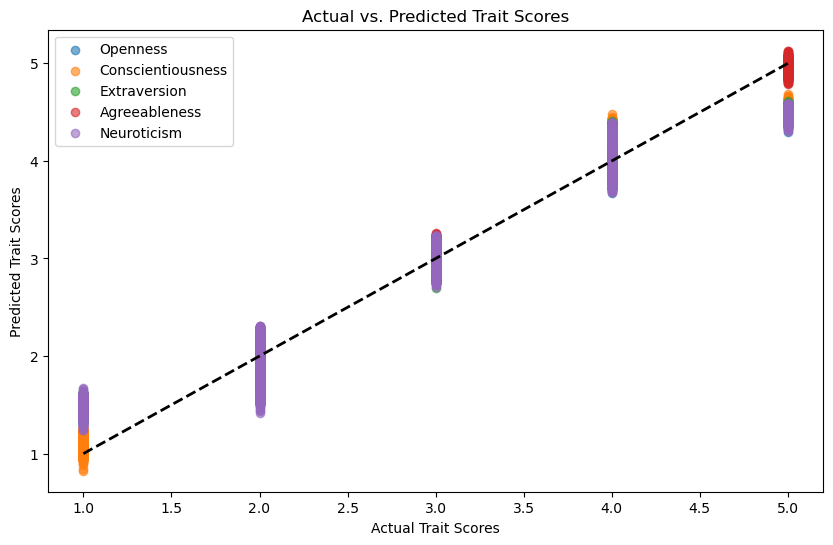

In [17]:
# Plot actual vs predicted for traits
plt.figure(figsize=(10, 6))
for i, trait_name in enumerate(["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]):
    plt.scatter(
        y_traits_test[:, i], traits_predictions[:, i], label=trait_name, alpha=0.6
    )

plt.plot([y_traits_test.min(), y_traits_test.max()], [y_traits_test.min(), y_traits_test.max()], "k--", lw=2)
plt.xlabel("Actual Trait Scores")
plt.ylabel("Predicted Trait Scores")
plt.title("Actual vs. Predicted Trait Scores")
plt.legend()
plt.show()